In [2]:
import pandas as pd
import numpy as np

import seaborn as sns

# Qualys 2022 TruRisk Report CVEs

In [3]:
df_qualys2022 = pd.read_csv('../data_in/qualys/qualys_2022_report_cves.csv')
df_qualys2022 = df_qualys2022.rename(columns={"CVE": "cve"})
df_qualys2022

,cve,TITLE,QVS
0,CVE-2021-4034,polkits pkexec Local Privilege Escalation Vuln...,95
1,CVE-2022-0028,Palo Alto Networks PAN-OS Reflected Amplificat...,95
2,CVE-2022-0543,Debian-specific Redis Server Lua Sandbox Escap...,95
3,CVE-2022-0609,Google Chrome Animation Module Use-After-Free ...,95
4,CVE-2022-0824,webmin Improper Access Control to Remote Code ...,75
...,...,...,...
185,CVE-2022-42827,Apple iOS and iPadOS Out-of-Bounds Write Vulne...,95
186,CVE-2022-42856,Apple iOS Type Confusion Vulnerability,95
187,CVE-2022-44698,Microsoft Defender SmartScreen Security Featur...,95
188,CVE-2022-45045,Xiongmai NVR Multiple Devices Arbitrary Comman...,41


In [4]:
df_enriched = pd.read_csv('../data_out/nvd_cves_v3_enriched.csv.gz', compression="gzip")
df_enriched

,cve,baseScore,attackComplexity,attackVector,userInteraction,privilegesRequired,confidentialityImpact,integrityImpact,availabilityImpact,metasploit,nuclei,epss,exploitdb,cisa_kev,msrc,gpz,exploit
0,CVE-1999-0199,9.8,LOW,NETWORK,NONE,NONE,HIGH,HIGH,HIGH,False,False,0.00604,False,False,False,False,5
1,CVE-1999-0236,7.5,LOW,NETWORK,NONE,NONE,HIGH,NONE,NONE,False,False,0.00137,True,False,False,False,4
2,CVE-2000-0258,7.5,LOW,NETWORK,NONE,NONE,NONE,NONE,HIGH,False,False,0.00590,False,False,False,False,5
3,CVE-2000-1254,7.5,LOW,NETWORK,NONE,NONE,HIGH,NONE,NONE,False,False,0.00543,False,False,False,False,5
4,CVE-2002-20001,7.5,LOW,NETWORK,NONE,NONE,NONE,NONE,HIGH,False,False,0.00544,False,False,False,False,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141356,CVE-2023-5632,7.5,LOW,NETWORK,NONE,NONE,NONE,NONE,HIGH,False,False,0.00044,False,False,False,False,5
141357,CVE-2023-5638,5.4,LOW,NETWORK,REQUIRED,LOW,LOW,LOW,NONE,False,False,0.00051,False,False,False,False,5
141358,CVE-2023-5639,5.4,LOW,NETWORK,REQUIRED,LOW,LOW,LOW,NONE,False,False,0.00051,False,False,False,False,5
141359,CVE-2023-5642,9.8,LOW,NETWORK,NONE,NONE,HIGH,HIGH,HIGH,False,False,0.00890,False,False,False,False,5


In [5]:
df_qualys2022 = pd.merge(df_qualys2022, df_enriched,  on='cve', how='left').fillna(False)
df_qualys2022

,cve,TITLE,QVS,baseScore,attackComplexity,attackVector,userInteraction,privilegesRequired,confidentialityImpact,integrityImpact,availabilityImpact,metasploit,nuclei,epss,exploitdb,cisa_kev,msrc,gpz,exploit
0,CVE-2021-4034,polkits pkexec Local Privilege Escalation Vuln...,95,7.8,LOW,LOCAL,NONE,LOW,HIGH,HIGH,HIGH,True,False,0.00046,True,True,False,False,0
1,CVE-2022-0028,Palo Alto Networks PAN-OS Reflected Amplificat...,95,8.6,LOW,NETWORK,NONE,NONE,NONE,NONE,HIGH,False,False,0.00340,False,True,False,False,0
2,CVE-2022-0543,Debian-specific Redis Server Lua Sandbox Escap...,95,10.0,LOW,NETWORK,NONE,NONE,HIGH,HIGH,HIGH,True,True,0.97103,False,True,False,False,0
3,CVE-2022-0609,Google Chrome Animation Module Use-After-Free ...,95,8.8,LOW,NETWORK,REQUIRED,NONE,HIGH,HIGH,HIGH,False,False,0.05681,False,True,False,True,0
4,CVE-2022-0824,webmin Improper Access Control to Remote Code ...,75,8.8,LOW,NETWORK,NONE,LOW,HIGH,HIGH,HIGH,True,True,0.97250,True,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,CVE-2022-42827,Apple iOS and iPadOS Out-of-Bounds Write Vulne...,95,7.8,LOW,LOCAL,REQUIRED,NONE,HIGH,HIGH,HIGH,False,False,0.00070,False,True,False,True,0
186,CVE-2022-42856,Apple iOS Type Confusion Vulnerability,95,8.8,LOW,NETWORK,REQUIRED,NONE,HIGH,HIGH,HIGH,False,False,0.00178,False,True,False,True,0
187,CVE-2022-44698,Microsoft Defender SmartScreen Security Featur...,95,5.4,LOW,NETWORK,REQUIRED,NONE,NONE,LOW,LOW,False,False,0.00925,False,True,False,False,0
188,CVE-2022-45045,Xiongmai NVR Multiple Devices Arbitrary Comman...,41,8.8,LOW,NETWORK,NONE,LOW,HIGH,HIGH,HIGH,False,False,0.00069,False,False,False,False,5


In [20]:
# QVS score > 90 and not CISA KEV or Metasploit or Nuclei
df_qualys_90 = df_qualys2022[df_qualys2022["QVS"] >=90]
df_qualys_90 = df_qualys_90[df_qualys_90["exploit"] > 3] 
df_qualys_90

,cve,TITLE,QVS,baseScore,attackComplexity,attackVector,userInteraction,privilegesRequired,confidentialityImpact,integrityImpact,availabilityImpact,metasploit,nuclei,epss,exploitdb,cisa_kev,msrc,gpz,exploit
73,CVE-2022-23812,node-ipc Malicious peacenotwar Package Import ...,95,9.8,LOW,NETWORK,NONE,NONE,HIGH,HIGH,HIGH,False,False,0.01055,False,False,False,False,5
82,CVE-2022-24934,Kingsoft WPS Office wpsupdater.exe Remote Code...,95,9.8,LOW,NETWORK,NONE,NONE,HIGH,HIGH,HIGH,False,False,0.00628,False,False,False,False,5
105,CVE-2022-26504,Veeam Backup & Replication Improper Authentica...,95,8.8,LOW,NETWORK,NONE,LOW,HIGH,HIGH,HIGH,False,False,0.00112,False,False,False,False,5
125,CVE-2022-30170,Windows Credential Roaming Service Elevation o...,95,7.3,LOW,LOCAL,REQUIRED,LOW,HIGH,HIGH,HIGH,False,False,0.00044,False,False,False,False,5
134,CVE-2022-31460,Meeting Owl Pro and Whiteboard Owl Hard-Coded ...,95,7.4,LOW,ADJACENT_NETWORK,NONE,NONE,NONE,HIGH,NONE,False,False,0.00053,False,False,False,False,5
146,CVE-2022-34151,OMRON Corporation Multiple Products Credential...,95,8.1,HIGH,NETWORK,NONE,NONE,HIGH,HIGH,HIGH,False,False,0.00645,False,False,False,False,5
149,CVE-2022-34721,Windows Internet Key Exchange (IKE) Protocol E...,95,9.8,LOW,NETWORK,NONE,NONE,HIGH,HIGH,HIGH,False,False,0.01059,False,False,False,False,5
189,CVE-2022-45359,YITH WooCommerce Gift Cards Premium Plugin Arb...,95,9.8,LOW,NETWORK,NONE,NONE,HIGH,HIGH,HIGH,False,False,0.00091,False,False,False,False,5


Text(0.5, 0.98, 'Qualys 2022 CVE report with QVS scores vs EPSS')

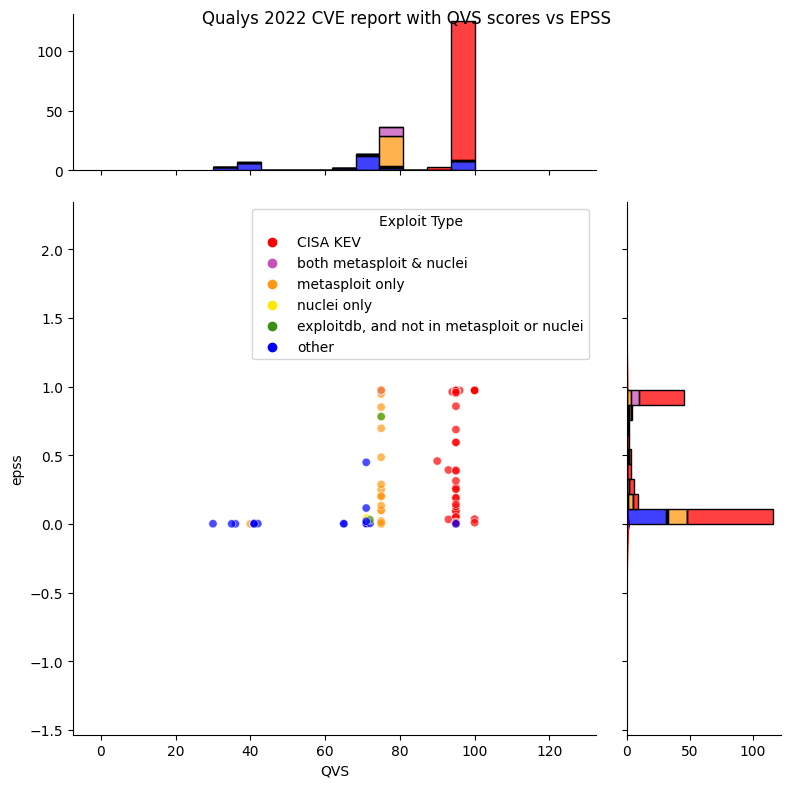

In [9]:
palette1 = ["#ff0000", "#C750BD", "#FF9913", "#FFE900", "#398e14", "#0000FF"]

g=sns.jointplot(data=df_qualys2022, x='QVS', y='epss', kind='scatter', height=8, ratio=3, marginal_ticks=True, alpha=.7, hue="exploit", palette=palette1)
handles, labels = g.ax_joint.get_legend_handles_labels()
g.ax_joint.legend(handles=handles, labels = ['CISA KEV', 'both metasploit & nuclei', 'metasploit only', 'nuclei only', 'exploitdb, and not in metasploit or nuclei', 'other'], title="Exploit Type")
g.plot_marginals(sns.histplot, multiple="stack")
g.fig.suptitle("Qualys 2022 CVE report with QVS scores vs EPSS")

Text(0.5, 0.98, 'Qualys 2022 CVE report with QVS scores vs CVSS Base Score')

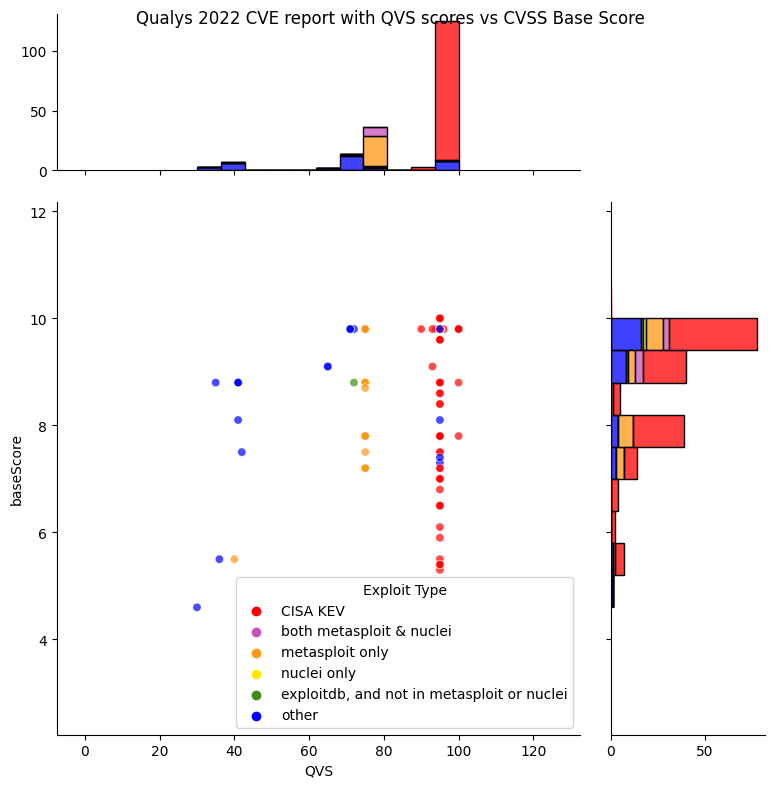

In [10]:
import matplotlib.pyplot as plt

palette1 = ["#ff0000", "#C750BD", "#FF9913", "#FFE900", "#398e14", "#0000FF"]

g=sns.jointplot(data=df_qualys2022, x='QVS', y='baseScore', kind='scatter', height=8, ratio=3, marginal_ticks=True, alpha=.7, hue="exploit", palette=palette1)
handles, labels = g.ax_joint.get_legend_handles_labels()
g.ax_joint.legend(handles=handles, labels = ['CISA KEV', 'both metasploit & nuclei', 'metasploit only', 'nuclei only', 'exploitdb, and not in metasploit or nuclei', 'other'], title="Exploit Type")
g.plot_marginals(sns.histplot, multiple="stack")
g.fig.suptitle("Qualys 2022 CVE report with QVS scores vs CVSS Base Score")

# Spearman Correlation Coefficient


### QVS vs EPSS

In [11]:
df_epss = df_qualys2022[["QVS", "epss"]]
df_epss

,QVS,epss
0,95,0.00046
1,95,0.00340
2,95,0.97103
3,95,0.05681
4,75,0.97250
...,...,...
185,95,0.00070
186,95,0.00178
187,95,0.00925
188,41,0.00069


In [12]:
my_r = df_epss.corr(method="spearman")
my_r

,QVS,epss
QVS,1.000000,0.216579
epss,0.216579,1.000000


### QVS vs CVSS

In [13]:
df_cvss = df_qualys2022[["QVS", "baseScore"]]
df_cvss

,QVS,baseScore
0,95,7.8
1,95,8.6
2,95,10.0
3,95,8.8
4,75,8.8
...,...,...
185,95,7.8
186,95,8.8
187,95,5.4
188,41,8.8


In [14]:
my_r = df_cvss.corr(method="spearman")
my_r

,QVS,baseScore
QVS,1.000000,-0.025414
baseScore,-0.025414,1.000000


### QVS vs CVSS vs EPSS with Plots

In [15]:
df = df_qualys2022[["QVS", "epss", "baseScore"]]


In [16]:
#code and explanation from https://stackabuse.com/calculating-spearmans-rank-correlation-coefficient-in-python-with-pandas/
def display_correlation(df):
    r = df.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
    plt.title("Spearman Correlation")
    return(r)

In [17]:
def display_corr_pairs(df,color="cyan"):
    s = set_title = np.vectorize(lambda ax,r,rho: ax.title.set_text("r = " + 
                                        "{:.2f}".format(r) + 
                                        '\n $\\rho$ = ' + 
                                        "{:.2f}".format(rho)) if ax!=None else None)      
    r = display_correlation(df)
    rho = df.corr(method="pearson")
    g = sns.PairGrid(df,corner=True)
    g.map_diag(plt.hist,color="yellow")
    g.map_lower(sns.scatterplot,color="magenta")
    set_title(g.axes,r,rho)
    plt.subplots_adjust(hspace = 0.6)
    plt.show()    

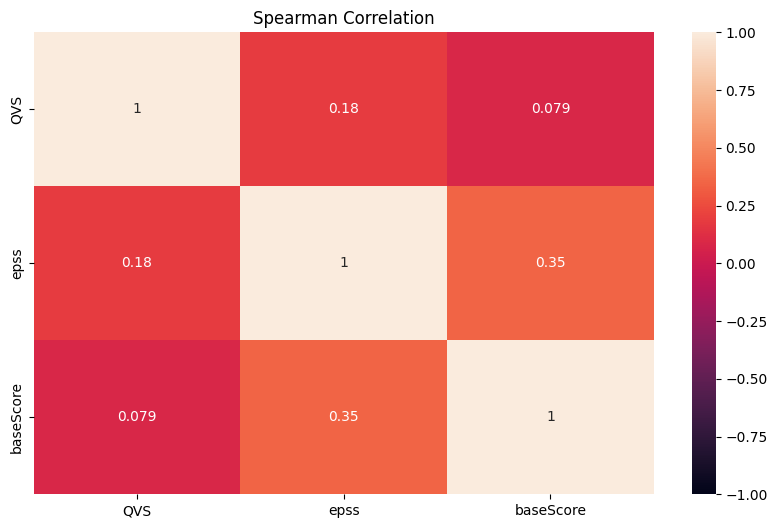

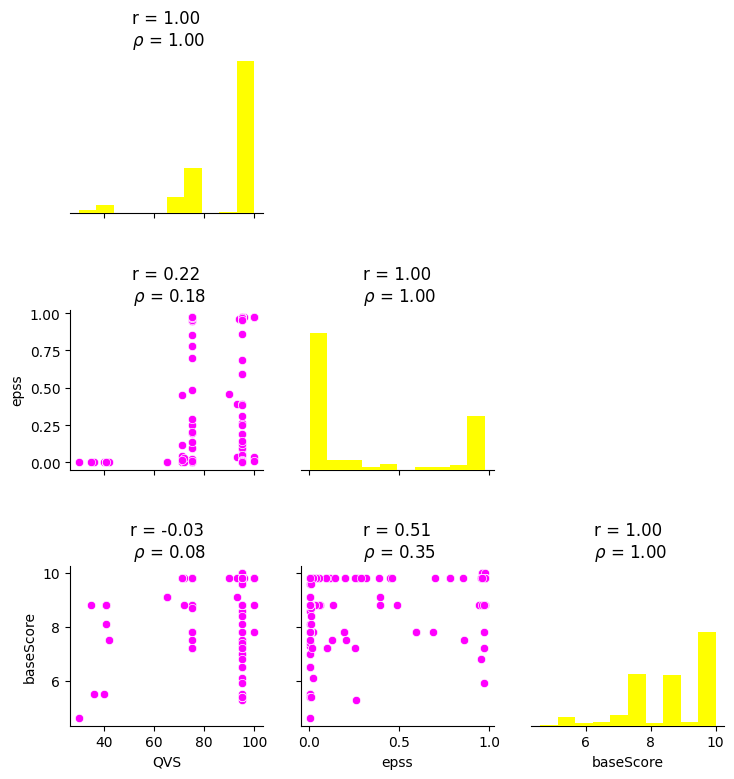

In [18]:
display_corr_pairs(df)
